In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/IMDB%20Synopsis%20Indonesian%20Movies/imdb_indonesian_movies_2.csv")
df.head()

,judul_film,ringkasan_sinopsis,genre
0,Sunan Kalijaga,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Gie,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL Movie,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Sang pencerah,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [2]:
df = df.drop(columns=['judul_film'])
df.head()

,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [3]:
df.isnull().sum()

ringkasan_sinopsis    0
genre                 0
dtype: int64

In [4]:
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru.head()

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0


In [5]:
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih) 
tokenizer.fit_on_texts(sinopsis_test)
 
sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, validation_data=(padded_test, label_test), verbose=2)

2022-04-15 15:15:31.053885: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-15 15:15:31.505624: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
26/26 - 49s - loss: 1.6095 - accuracy: 0.2002 - val_loss: 1.6094 - val_accuracy: 0.2338
Epoch 2/30
26/26 - 46s - loss: 1.6098 - accuracy: 0.2065 - val_loss: 1.6106 - val_accuracy: 0.1642
Epoch 3/30
26/26 - 46s - loss: 1.6104 - accuracy: 0.2152 - val_loss: 1.6120 - val_accuracy: 0.1642
Epoch 4/30
26/26 - 46s - loss: 1.6083 - accuracy: 0.2226 - val_loss: 1.6116 - val_accuracy: 0.1642
Epoch 5/30
26/26 - 46s - loss: 1.6069 - accuracy: 0.2463 - val_loss: 1.6124 - val_accuracy: 0.1741
Epoch 6/30
26/26 - 46s - loss: 1.5996 - accuracy: 0.2587 - val_loss: 1.6003 - val_accuracy: 0.1642
Epoch 7/30
26/26 - 46s - loss: 1.5437 - accuracy: 0.3246 - val_loss: 1.5856 - val_accuracy: 0.2637
Epoch 8/30
26/26 - 46s - loss: 1.3626 - accuracy: 0.3843 - val_loss: 1.6796 - val_accuracy: 0.1940
Epoch 9/30
26/26 - 46s - loss: 1.2362 - accuracy: 0.3955 - val_loss: 1.8415 - val_accuracy: 0.2139
Epoch 10/30
26/26 - 46s - loss: 1.0827 - accuracy: 0.4764 - val_loss: 2.2496 - val_accuracy: 0.2338
Epoch 11/

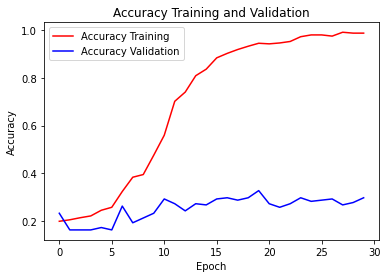

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r', label='Accuracy Training')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy Validation')
plt.title('Accuracy Training and Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

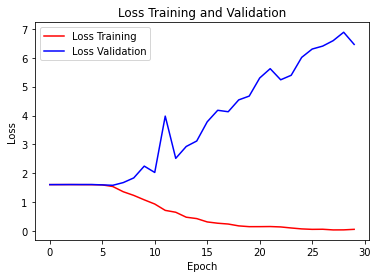

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r', label='Loss Training')
plt.plot(history.history['val_loss'], 'b', label='Loss Validation')
plt.title('Loss Training and Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

In [9]:
import numpy as np
hasil = ["sebuah keluarga sedang dihantui oleh roh yang tidak dikenal."]
hasil = tokenizer.texts_to_sequences(hasil)
hasil = pad_sequences(hasil)
hasil = np.argmax(model.predict(hasil), axis=-1)
if hasil == [0]:
  print('Drama')
elif hasil == [1]:
  print('Horor')
elif hasil == [2]:
  print('Komedi')
elif hasil == [3]:
  print('Laga')
elif hasil == [4]:
  print('Romantis')

Horor
